## Problem Statement : 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

### What is the expectation of Company :
1.company wants to know which variables contribute better for the predicting the  demand for their bikes.
2.develop a model which shows the variable which have greater influence on the demand for the bikes

### Step 1 : Import all neccessary packages to build the model 

In [1]:
#lets Start with Importing all the pacjages we need to build the model
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

### Step 2 : Loading the Data and understanding the data 

In [2]:
boombikes_data = pd.read_csv('day.csv')

In [3]:
#check how many total number of columns and rows the dataset has
boombikes_data.shape

(730, 16)

In [4]:
#Check for the different kind of data the dataset hols
boombikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#check for datatype of columns and null values
boombikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#lets see the basic numerical data like min,max,std etc for numerical columns
boombikes_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#lets understand the data by visualising in the charts but before that let's see if there is any column data which can be removed from our dataset
#remove 'instant' column as it just as record index
boombikes_data.drop(['instant'], axis = 1, inplace = True)

#we have a variable as 'cnt' which is sum of 'casual' and 'registered', So lets remove 'casual' and 'registered' 
boombikes_data.drop(['casual'],axis=1, inplace = True)
boombikes_data.drop(['registered'],axis=1, inplace = True)

#we have separate columns for month,weekday, So lets remove dteday
boombikes_data.drop(['dteday'], axis = 1, inplace = True)

In [8]:
boombikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Step3 : Visualizing the data and data preparation

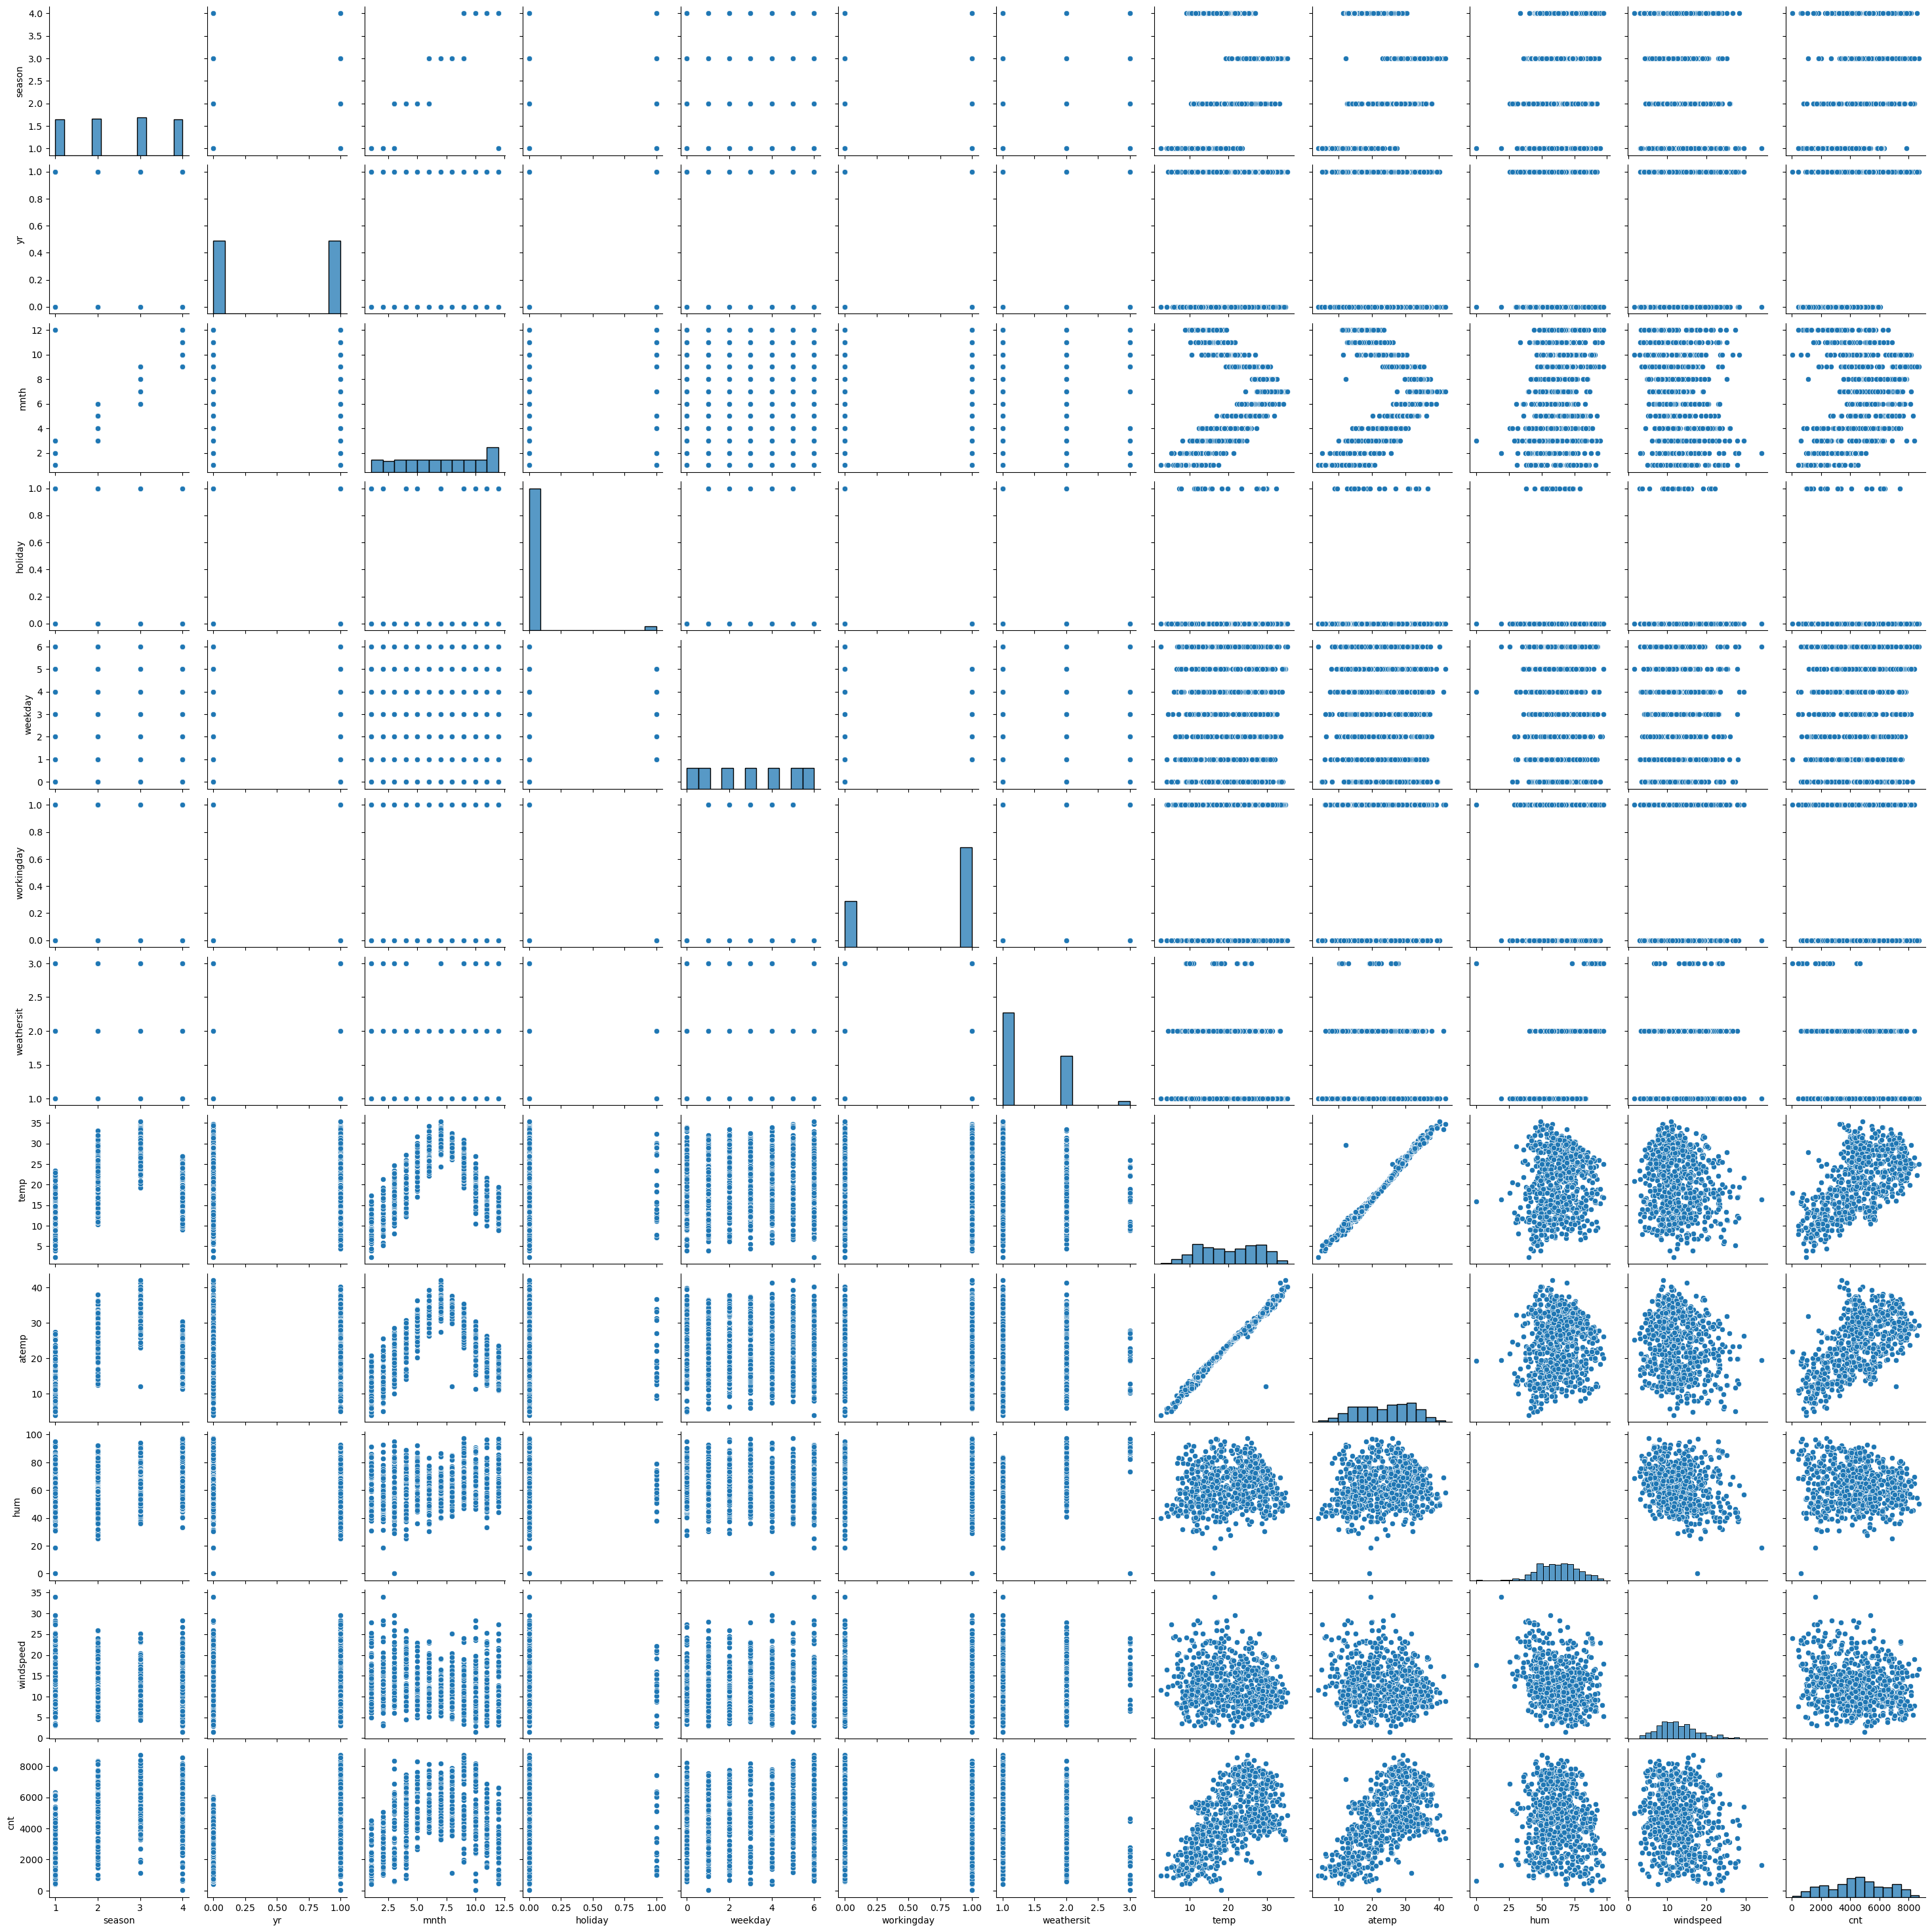

In [9]:
#visualize numerical column values
sns.pairplot(boombikes_data)
plt.show()

As we can see from above chart 'temp' and 'atemp' seems to have Highest correlation with target variable 'cnt'

In [10]:
#there are also columns with Categorical values(currently represtented in Numerical values), let's visualize them against our Target variable to understand the data better
#before plotting them lets see the different set of values they hold
boombikes_data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
boombikes_data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
boombikes_data.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [13]:
boombikes_data.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [14]:
boombikes_data.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [15]:
boombikes_data.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [16]:
boombikes_data.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [17]:
#as we have season,weathersit,mnth,weekday in numerical representation, lets convert them to categorical types

boombikes_data.weathersit.replace({1:'partly cloudy',2:'cloudy',3:'medium rain',4:'heavy rain'},inplace = True)

boombikes_data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

boombikes_data.weekday = boombikes_data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

boombikes_data.mnth = boombikes_data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [18]:
boombikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,partly cloudy,9.305237,11.46350,43.6957,12.522300,1600


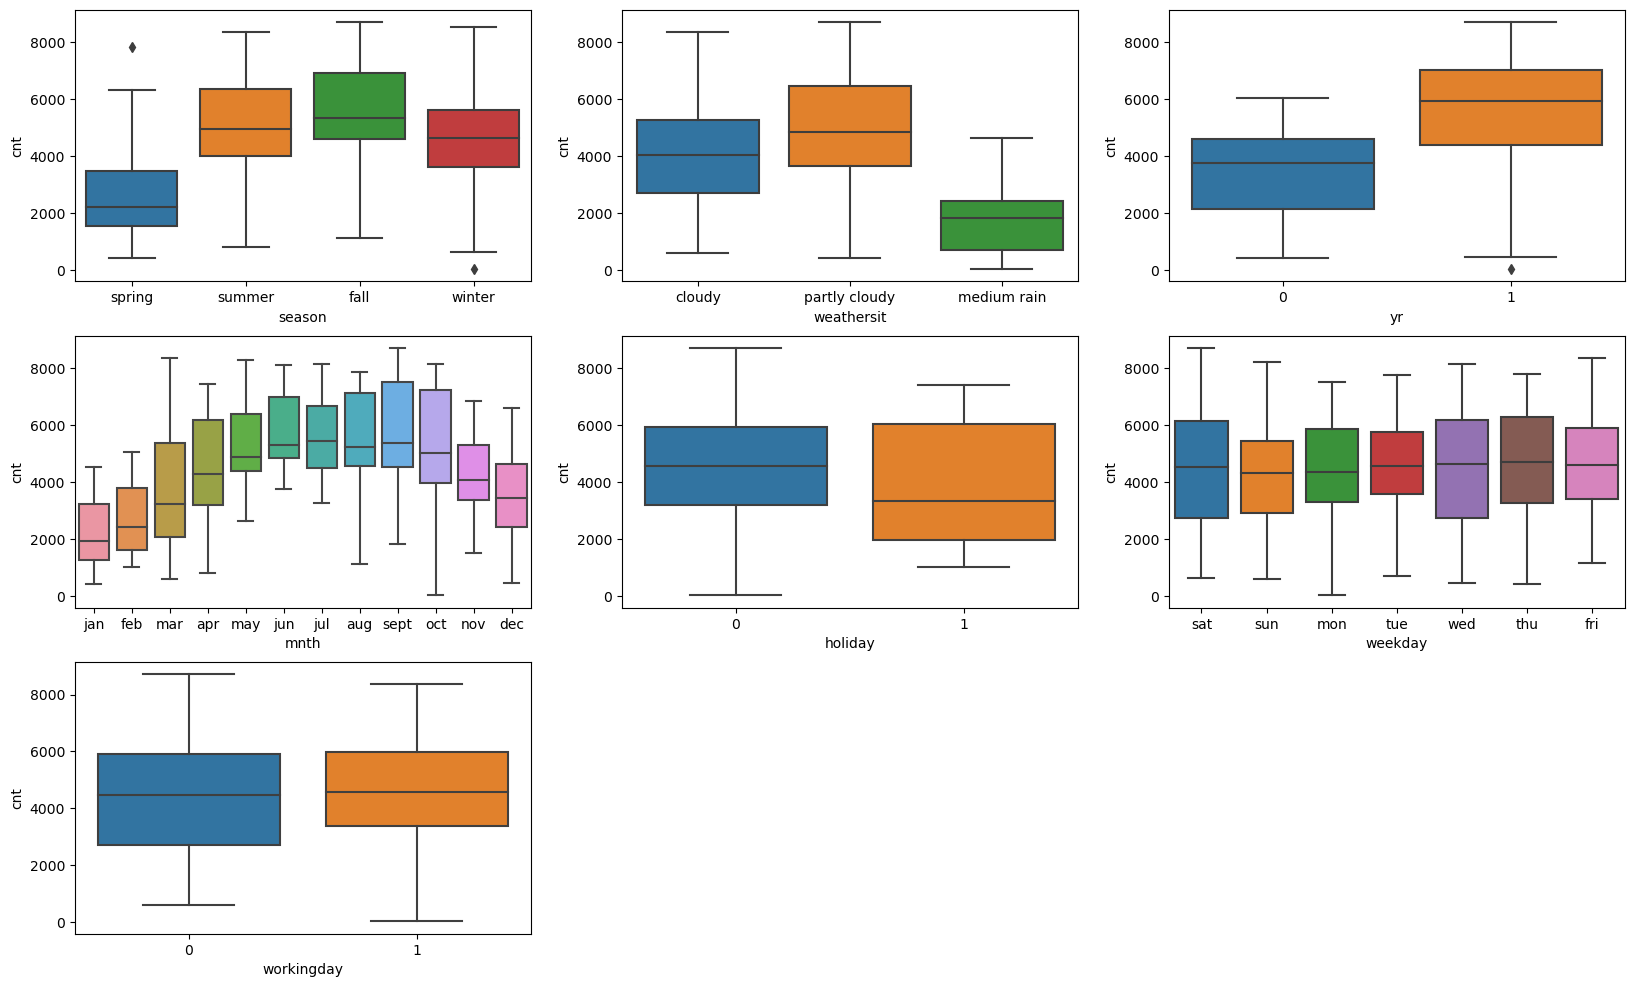

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = boombikes_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = boombikes_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombikes_data)
plt.show()

As we can see from above chart 
1.when season is summer or fall we can see huge demand for bikes
2.there is significant rise for bikes in year 2019

Creating dummy variables for the categorical variables

In [20]:
boombikes_data = pd.get_dummies(data=boombikes_data,columns=["season","mnth","weekday"],drop_first=True)
boombikes_data = pd.get_dummies(data=boombikes_data,columns=["weathersit"])

In [21]:
boombikes_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_medium rain,weathersit_partly cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,0,1


### Step 4 : Splitting the Data into Training and Testing Sets

In [22]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
boombikes_data_train, boombikes_data_test = train_test_split(boombikes_data, train_size = 0.7, test_size = 0.3, random_state = 100)

Scaling the features

There are few columns which have higher interger or float values compared to others, so let us rescale them to have a comparable scale

In [23]:
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']

In [24]:
boombikes_data_train[num_vars] = scaler.fit_transform(boombikes_data_train[num_vars])

In [25]:
boombikes_data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_medium rain,weathersit_partly cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,1,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,1,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,1,0,0


In [26]:
boombikes_data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_medium rain,weathersit_partly cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412,0.627451
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


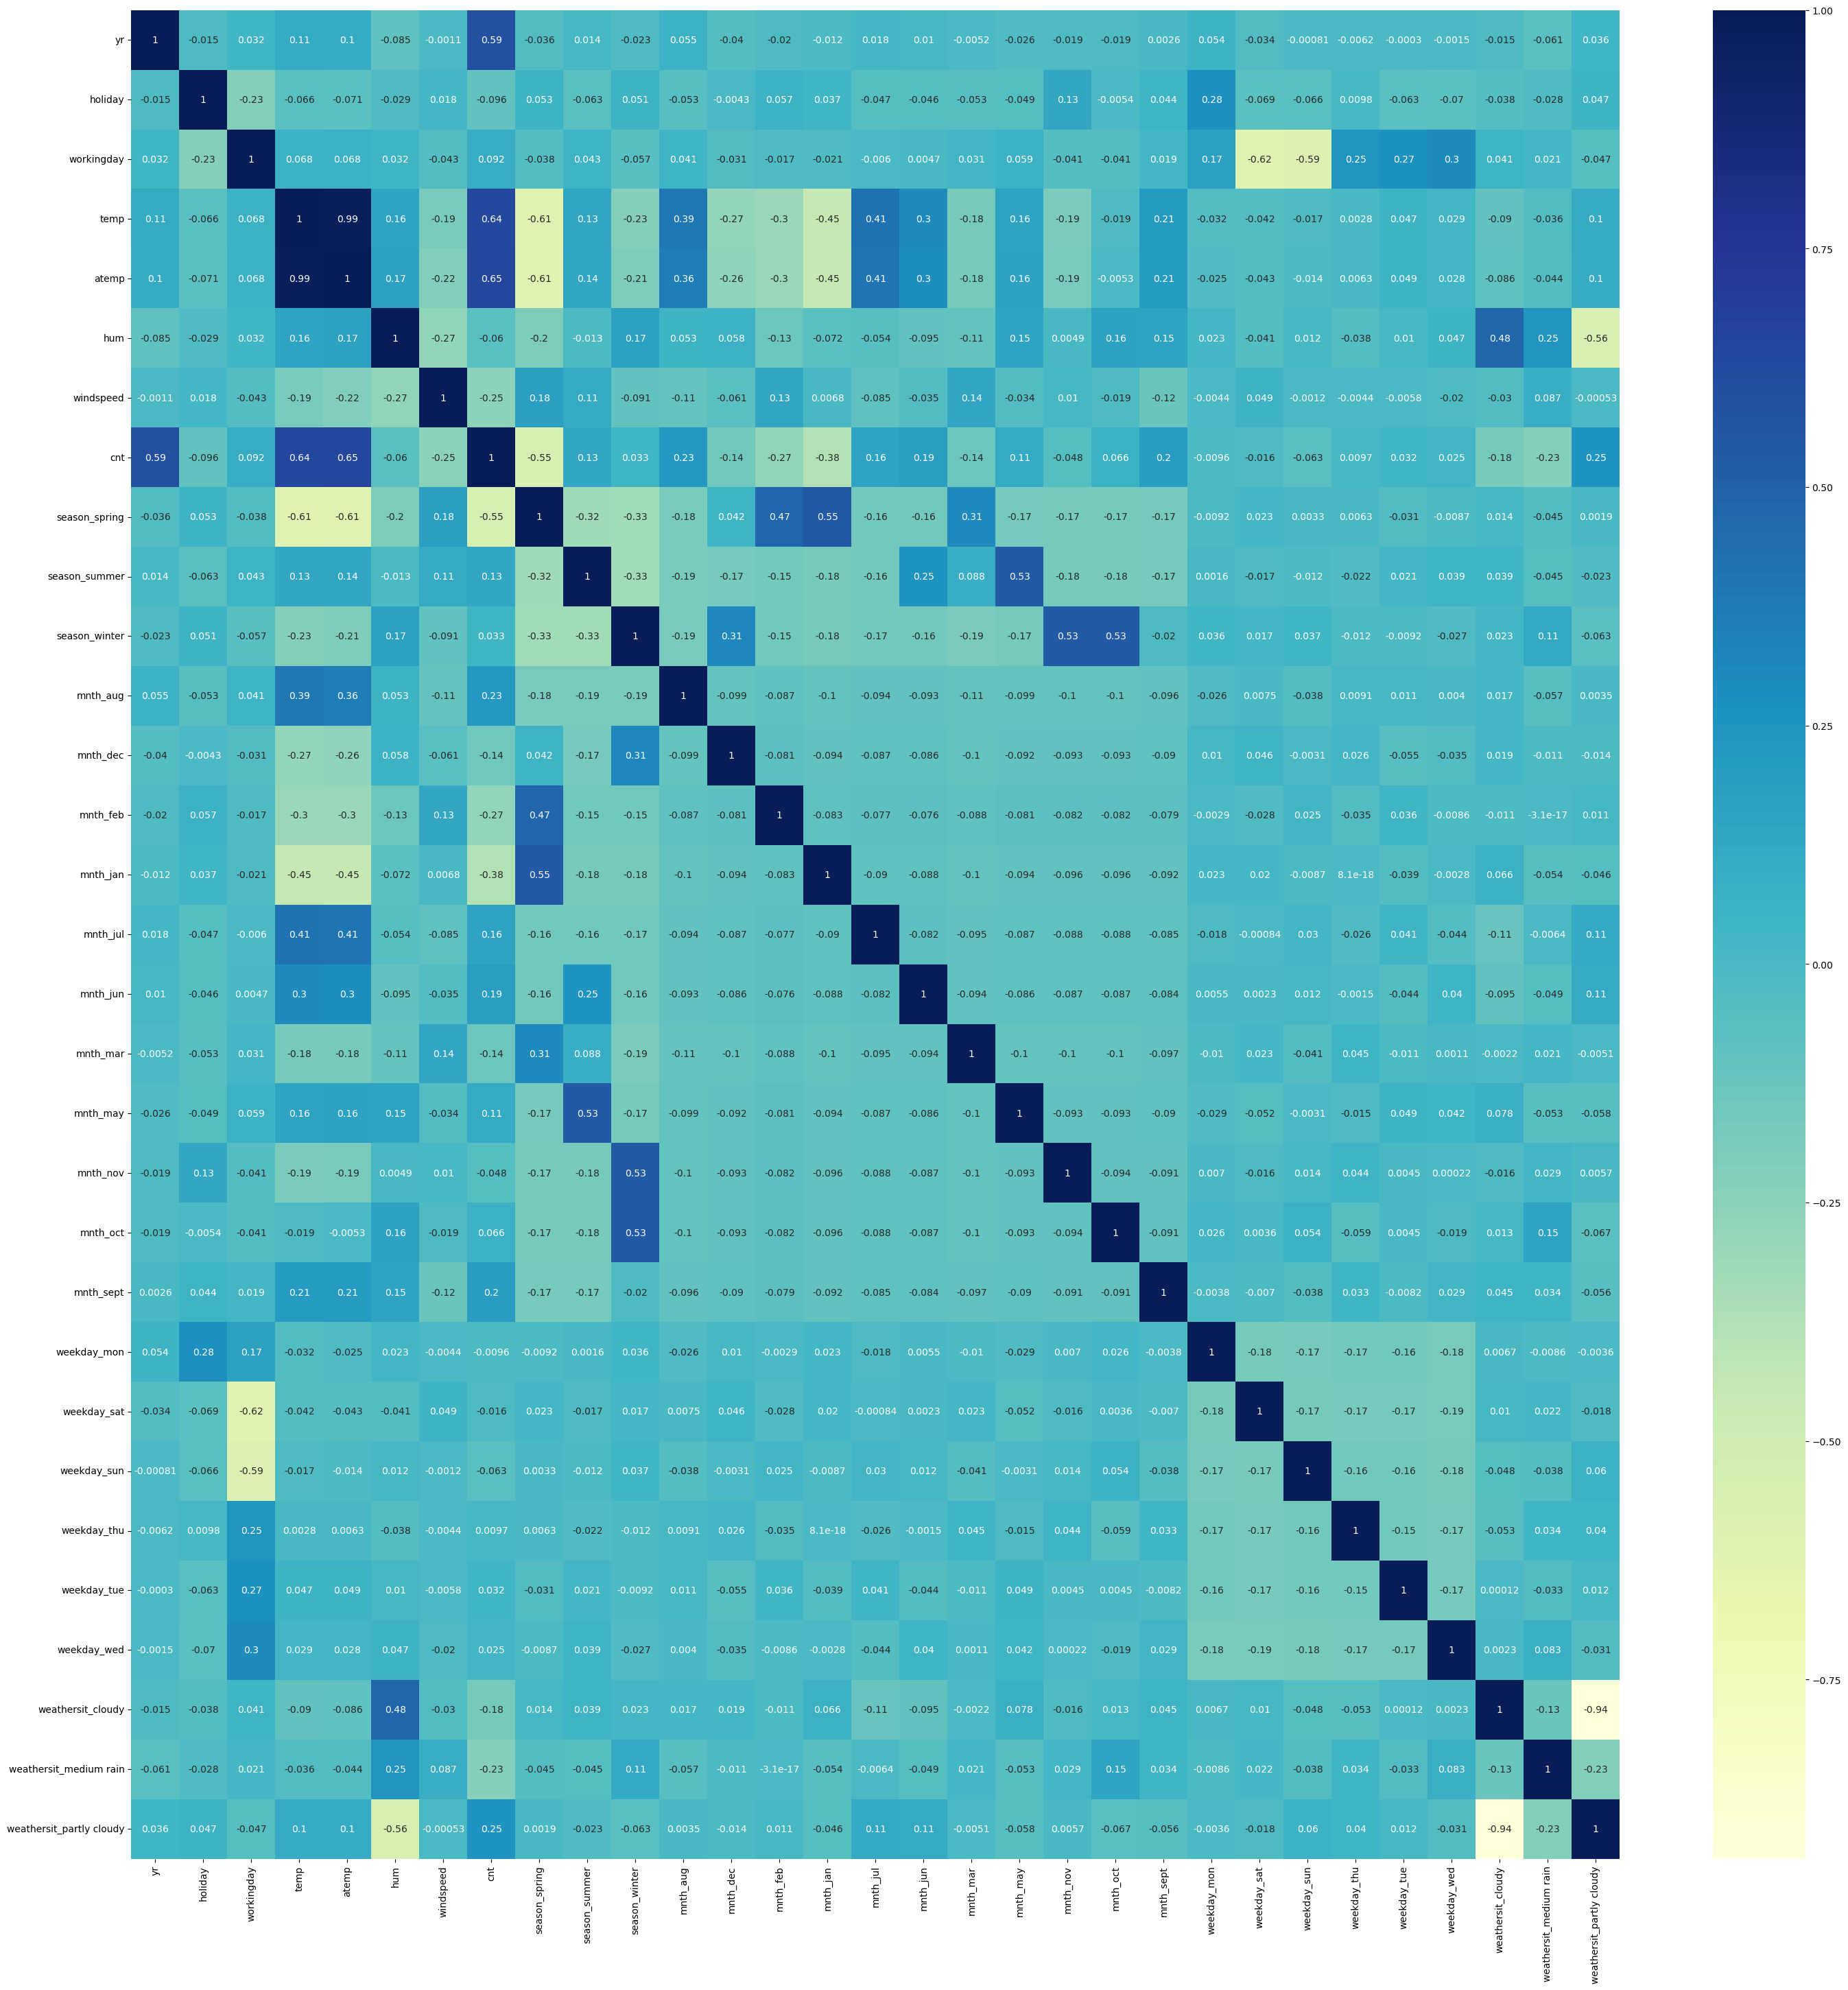

In [27]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (35, 35))
sns.heatmap(boombikes_data_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

cnt and atemp seems to be highly correlated, Let's see a pairplot for atemp vs cnt.

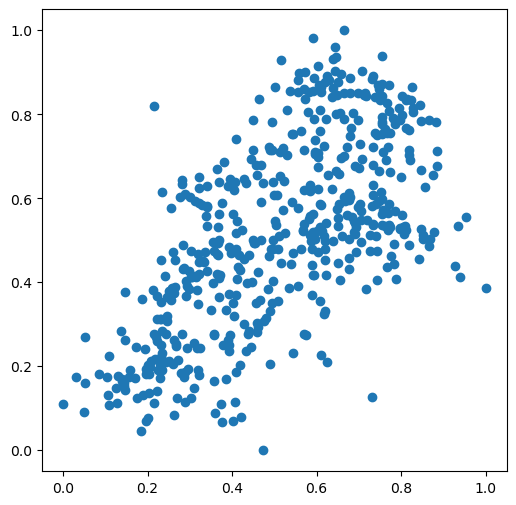

In [28]:
plt.figure(figsize=[6,6])
plt.scatter(boombikes_data_train.atemp, boombikes_data_train.cnt)
plt.show()

So let's pick atemp as the variable and start fit a regression line for it

Dividing into X and Y sets for the model building

In [29]:
y_train = boombikes_data_train.pop('cnt')
X_train = boombikes_data_train

### Step 5: Building a linear model
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [30]:
# Add a constant
X_train_lm = sm.add_constant(X_train['atemp'])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [31]:
lr.params

const    0.162924
atemp    0.683633
dtype: float64

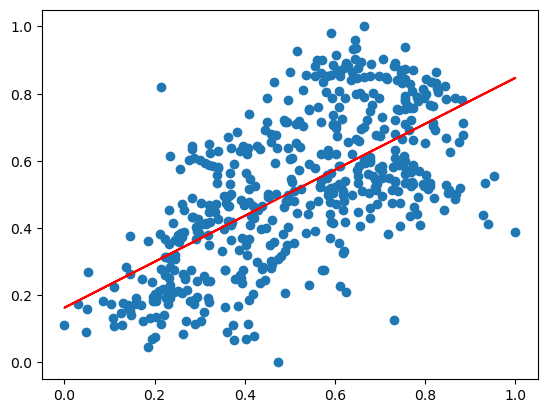

In [32]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163 + 0.684*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [33]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           1.10e-61
Time:                        15:34:49   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

Adding another variable
The R-squared value obtained is 0.418. as we have other variables as well, lets add a variable which had second highest Correlation with target variable. i.e. temp.

In [34]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'temp']]

In [35]:
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.163383
atemp    0.492316
temp     0.181818
dtype: float64

In [36]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           1.95e-60
Time:                        15:34:49   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.0

In [37]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'temp','yr']]

In [38]:
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072352
atemp    0.545027
temp     0.076265
yr       0.237672
dtype: float64

In [39]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     385.8
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          2.62e-130
Time:                        15:34:49   Log-Likelihood:                 341.97
No. Observations:                 510   AIC:                            -675.9
Df Residuals:                     506   BIC:                            -659.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0724      0.015      4.820      0.0

Adding all the variables to the model

In [40]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

lr_1.params

const                       0.126718
yr                          0.232208
holiday                    -0.018941
workingday                  0.067332
temp                        0.401322
atemp                       0.050628
hum                        -0.151812
windspeed                  -0.184388
season_spring              -0.048580
season_summer               0.038216
season_winter               0.105387
mnth_aug                    0.016076
mnth_dec                   -0.045572
mnth_feb                   -0.032176
mnth_jan                   -0.062565
mnth_jul                   -0.039277
mnth_jun                   -0.001704
mnth_mar                    0.001288
mnth_may                    0.024691
mnth_nov                   -0.041783
mnth_oct                    0.007695
mnth_sept                   0.081806
weekday_mon                -0.021502
weekday_sat                 0.066430
weekday_sun                 0.011897
weekday_thu                -0.009750
weekday_tue                -0.019308
w

In [41]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          8.42e-181
Time:                        15:34:49   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

With all the varibales we have a R-Square value of 0.853 but there are varibales which have a high P value.

Let's drop few of those varibales which have high P value.

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

follow the below priority for dropping the variable using VIF and P value

1.High p-value, high VIF

2.High - low:

    High p,low VIF:remove these first
    
    Low p,high VIF:remove these after the ones above
    
3.low p,low VIF

In [42]:
def calculate_VIF(m):
    vif = pd.DataFrame()
    vif['Features'] = m.columns
    vif['VIF'] = [variance_inflation_factor(m.values, i) for i in range(m.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
calculate_VIF(X_train)

                    Features    VIF
29  weathersit_partly cloudy    inf
1                    holiday    inf
2                 workingday    inf
28    weathersit_medium rain    inf
27         weathersit_cloudy    inf
22               weekday_sat    inf
23               weekday_sun    inf
3                       temp  67.12
4                      atemp  56.09
7              season_spring  10.80
9              season_winter   9.52
8              season_summer   8.31
18                  mnth_nov   6.80
19                  mnth_oct   6.59
10                  mnth_aug   6.54
13                  mnth_jan   5.90
14                  mnth_jul   5.70
11                  mnth_dec   5.68
20                 mnth_sept   4.96
12                  mnth_feb   4.39
16                  mnth_mar   3.47
15                  mnth_jun   2.88
17                  mnth_may   2.24
5                        hum   2.05
21               weekday_mon   1.98
26               weekday_wed   1.94
24               weekday_thu

there are variables with inf VIF values, lets remove them now

In [43]:
X = X_train.drop('atemp', axis=1)

In [44]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          8.74e-182
Time:                        15:34:49   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [45]:
calculate_VIF(X)

                    Features    VIF
28  weathersit_partly cloudy    inf
22               weekday_sun    inf
2                 workingday    inf
27    weathersit_medium rain    inf
26         weathersit_cloudy    inf
21               weekday_sat    inf
1                    holiday    inf
6              season_spring  10.79
8              season_winter   9.50
7              season_summer   8.29
3                       temp   7.12
17                  mnth_nov   6.80
18                  mnth_oct   6.59
9                   mnth_aug   6.43
12                  mnth_jan   5.90
10                  mnth_dec   5.68
13                  mnth_jul   5.66
19                 mnth_sept   4.94
11                  mnth_feb   4.39
15                  mnth_mar   3.47
14                  mnth_jun   2.83
16                  mnth_may   2.22
4                        hum   2.05
20               weekday_mon   1.96
25               weekday_wed   1.93
23               weekday_thu   1.81
24               weekday_tue

In [46]:
X = X.drop('mnth_mar', axis=1)
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          8.33e-183
Time:                        15:34:49   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [47]:
calculate_VIF(X)

                    Features   VIF
27  weathersit_partly cloudy   inf
21               weekday_sun   inf
2                 workingday   inf
26    weathersit_medium rain   inf
25         weathersit_cloudy   inf
20               weekday_sat   inf
1                    holiday   inf
6              season_spring  9.69
8              season_winter  9.18
7              season_summer  7.98
3                       temp  6.93
9                   mnth_aug  5.71
13                  mnth_jul  5.14
16                  mnth_nov  4.87
17                  mnth_oct  4.81
18                 mnth_sept  4.08
10                  mnth_dec  3.40
12                  mnth_jan  2.62
14                  mnth_jun  2.54
4                        hum  2.04
11                  mnth_feb  2.02
19               weekday_mon  1.96
15                  mnth_may  1.95
24               weekday_wed  1.93
22               weekday_thu  1.81
23               weekday_tue  1.79
5                  windspeed  1.24
0                   

In [48]:
X = X.drop('mnth_jun', axis=1)
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          7.84e-184
Time:                        15:34:49   Log-Likelihood:                 527.94
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [49]:
calculate_VIF(X)

                    Features   VIF
26  weathersit_partly cloudy   inf
2                 workingday   inf
25    weathersit_medium rain   inf
24         weathersit_cloudy   inf
20               weekday_sun   inf
19               weekday_sat   inf
1                    holiday   inf
8              season_winter  8.86
6              season_spring  8.72
7              season_summer  7.44
3                       temp  4.96
15                  mnth_nov  4.76
16                  mnth_oct  4.51
9                   mnth_aug  3.51
10                  mnth_dec  3.37
13                  mnth_jul  3.06
17                 mnth_sept  2.87
12                  mnth_jan  2.55
4                        hum  2.02
11                  mnth_feb  2.00
18               weekday_mon  1.96
23               weekday_wed  1.93
21               weekday_thu  1.81
22               weekday_tue  1.79
14                  mnth_may  1.52
5                  windspeed  1.23
0                         yr  1.05


In [50]:
X = X.drop('weekday_wed', axis=1)
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          7.64e-185
Time:                        15:34:50   Log-Likelihood:                 527.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -899.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [51]:
calculate_VIF(X)

                    Features   VIF
25  weathersit_partly cloudy   inf
2                 workingday   inf
24    weathersit_medium rain   inf
23         weathersit_cloudy   inf
20               weekday_sun   inf
19               weekday_sat   inf
1                    holiday   inf
8              season_winter  8.86
6              season_spring  8.72
7              season_summer  7.44
3                       temp  4.96
15                  mnth_nov  4.76
16                  mnth_oct  4.51
9                   mnth_aug  3.51
10                  mnth_dec  3.37
13                  mnth_jul  3.06
17                 mnth_sept  2.87
12                  mnth_jan  2.55
4                        hum  2.01
11                  mnth_feb  2.00
14                  mnth_may  1.52
18               weekday_mon  1.40
21               weekday_thu  1.29
22               weekday_tue  1.28
5                  windspeed  1.23
0                         yr  1.05


In [52]:
X = X.drop('weekday_thu', axis=1)
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          7.61e-186
Time:                        15:34:50   Log-Likelihood:                 527.76
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -905.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [53]:
calculate_VIF(X)

                    Features   VIF
24  weathersit_partly cloudy   inf
20               weekday_sun   inf
2                 workingday   inf
19               weekday_sat   inf
23    weathersit_medium rain   inf
22         weathersit_cloudy   inf
1                    holiday   inf
8              season_winter  8.86
6              season_spring  8.72
7              season_summer  7.44
3                       temp  4.96
15                  mnth_nov  4.76
16                  mnth_oct  4.51
9                   mnth_aug  3.51
10                  mnth_dec  3.37
13                  mnth_jul  3.06
17                 mnth_sept  2.87
12                  mnth_jan  2.55
4                        hum  2.01
11                  mnth_feb  2.00
14                  mnth_may  1.52
18               weekday_mon  1.25
5                  windspeed  1.23
21               weekday_tue  1.16
0                         yr  1.05


In [54]:
X = X.drop('weathersit_partly cloudy', axis=1)
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          7.61e-186
Time:                        15:34:50   Log-Likelihood:                 527.76
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -905.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [55]:
calculate_VIF(X)

                  Features    VIF
2               workingday  71.24
19             weekday_sat  17.01
20             weekday_sun  16.00
8            season_winter   8.86
6            season_spring   8.72
7            season_summer   7.44
3                     temp   4.96
15                mnth_nov   4.76
16                mnth_oct   4.51
1                  holiday   4.00
9                 mnth_aug   3.51
10                mnth_dec   3.37
13                mnth_jul   3.06
17               mnth_sept   2.87
12                mnth_jan   2.55
4                      hum   2.01
11                mnth_feb   2.00
22       weathersit_cloudy   1.59
14                mnth_may   1.52
23  weathersit_medium rain   1.29
18             weekday_mon   1.25
5                windspeed   1.23
21             weekday_tue   1.16
0                       yr   1.05


In [56]:
X = X.drop('workingday', axis=1)
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          7.61e-186
Time:                        15:34:50   Log-Likelihood:                 527.76
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -905.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [57]:
calculate_VIF(X)

                  Features    VIF
3                      hum  35.53
2                     temp  21.21
7            season_winter  10.31
5            season_spring   7.19
6            season_summer   6.27
4                windspeed   5.02
15                mnth_oct   4.79
14                mnth_nov   4.75
8                 mnth_aug   3.36
9                 mnth_dec   3.31
12                mnth_jul   2.97
16               mnth_sept   2.68
11                mnth_jan   2.53
21       weathersit_cloudy   2.36
0                       yr   2.12
10                mnth_feb   2.04
13                mnth_may   1.61
17             weekday_mon   1.47
18             weekday_sat   1.38
19             weekday_sun   1.37
20             weekday_tue   1.33
22  weathersit_medium rain   1.31
1                  holiday   1.17


In [58]:
X = X.drop('hum', axis=1)
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     123.9
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          1.54e-183
Time:                        15:34:50   Log-Likelihood:                 519.58
No. Observations:                 510   AIC:                            -993.2
Df Residuals:                     487   BIC:                            -895.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [59]:
calculate_VIF(X)

                  Features    VIF
2                     temp  12.00
6            season_winter   9.67
4            season_spring   5.51
3                windspeed   4.89
5            season_summer   4.89
14                mnth_oct   4.57
13                mnth_nov   4.44
7                 mnth_aug   3.12
8                 mnth_dec   2.95
11                mnth_jul   2.89
15               mnth_sept   2.35
10                mnth_jan   2.35
0                       yr   2.10
9                 mnth_feb   1.99
20       weathersit_cloudy   1.61
12                mnth_may   1.60
16             weekday_mon   1.45
17             weekday_sat   1.38
18             weekday_sun   1.36
19             weekday_tue   1.33
1                  holiday   1.17
21  weathersit_medium rain   1.10


In [60]:
X = X.drop('mnth_aug', axis=1)
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     130.0
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          1.42e-184
Time:                        15:34:50   Log-Likelihood:                 519.51
No. Observations:                 510   AIC:                            -995.0
Df Residuals:                     488   BIC:                            -901.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [61]:
calculate_VIF(X)

                  Features   VIF
6            season_winter  9.37
2                     temp  5.71
3                windspeed  4.83
4            season_spring  4.56
12                mnth_nov  4.34
13                mnth_oct  4.34
7                 mnth_dec  2.93
5            season_summer  2.88
9                 mnth_jan  2.32
0                       yr  2.10
8                 mnth_feb  1.98
10                mnth_jul  1.62
11                mnth_may  1.59
19       weathersit_cloudy  1.57
14               mnth_sept  1.55
15             weekday_mon  1.45
16             weekday_sat  1.37
17             weekday_sun  1.35
18             weekday_tue  1.32
1                  holiday  1.17
20  weathersit_medium rain  1.10


In [62]:
X = X.drop('mnth_oct', axis=1)
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.8
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          1.27e-185
Time:                        15:34:51   Log-Likelihood:                 519.45
No. Observations:                 510   AIC:                            -996.9
Df Residuals:                     489   BIC:                            -908.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [63]:
calculate_VIF(X)

                  Features   VIF
2                     temp  5.66
3                windspeed  4.80
4            season_spring  4.40
6            season_winter  3.10
5            season_summer  2.84
9                 mnth_jan  2.22
0                       yr  2.10
8                 mnth_feb  1.89
12                mnth_nov  1.82
10                mnth_jul  1.61
11                mnth_may  1.59
18       weathersit_cloudy  1.57
7                 mnth_dec  1.55
14             weekday_mon  1.45
15             weekday_sat  1.37
13               mnth_sept  1.35
16             weekday_sun  1.35
17             weekday_tue  1.32
1                  holiday  1.16
19  weathersit_medium rain  1.09


In [64]:
X = X.drop('mnth_may', axis=1)
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.9
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          1.62e-186
Time:                        15:34:51   Log-Likelihood:                 518.99
No. Observations:                 510   AIC:                            -998.0
Df Residuals:                     490   BIC:                            -913.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [65]:
calculate_VIF(X)

                  Features   VIF
2                     temp  5.54
3                windspeed  4.71
4            season_spring  4.39
6            season_winter  3.10
5            season_summer  2.27
9                 mnth_jan  2.22
0                       yr  2.09
8                 mnth_feb  1.89
11                mnth_nov  1.82
10                mnth_jul  1.61
17       weathersit_cloudy  1.57
7                 mnth_dec  1.55
13             weekday_mon  1.45
14             weekday_sat  1.37
12               mnth_sept  1.35
15             weekday_sun  1.35
16             weekday_tue  1.32
1                  holiday  1.16
18  weathersit_medium rain  1.09


In [66]:
X = X.drop('weekday_sat', axis=1)
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.2
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          1.42e-187
Time:                        15:34:51   Log-Likelihood:                 518.90
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     491   BIC:                            -919.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [67]:
calculate_VIF(X)

                  Features   VIF
2                     temp  5.42
3                windspeed  4.68
4            season_spring  4.35
6            season_winter  3.06
5            season_summer  2.26
9                 mnth_jan  2.22
0                       yr  2.09
8                 mnth_feb  1.89
11                mnth_nov  1.82
10                mnth_jul  1.60
16       weathersit_cloudy  1.57
7                 mnth_dec  1.55
13             weekday_mon  1.36
12               mnth_sept  1.35
14             weekday_sun  1.26
15             weekday_tue  1.24
1                  holiday  1.16
17  weathersit_medium rain  1.09


In [68]:
X = X.drop('weekday_tue', axis=1)
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.7
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          2.76e-188
Time:                        15:34:51   Log-Likelihood:                 517.93
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     492   BIC:                            -923.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [69]:
calculate_VIF(X)

                  Features   VIF
2                     temp  5.30
3                windspeed  4.67
4            season_spring  4.35
6            season_winter  3.04
5            season_summer  2.25
9                 mnth_jan  2.21
0                       yr  2.09
8                 mnth_feb  1.88
11                mnth_nov  1.82
10                mnth_jul  1.60
15       weathersit_cloudy  1.57
7                 mnth_dec  1.55
12               mnth_sept  1.35
13             weekday_mon  1.32
14             weekday_sun  1.21
1                  holiday  1.16
16  weathersit_medium rain  1.09


In [70]:
X = X.drop('weekday_mon', axis=1)
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.2
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          6.17e-189
Time:                        15:34:51   Log-Likelihood:                 516.80
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     493   BIC:                            -927.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [71]:
calculate_VIF(X)

                  Features   VIF
2                     temp  5.27
3                windspeed  4.67
4            season_spring  4.34
6            season_winter  3.01
5            season_summer  2.24
9                 mnth_jan  2.21
0                       yr  2.08
8                 mnth_feb  1.88
11                mnth_nov  1.81
10                mnth_jul  1.60
14       weathersit_cloudy  1.57
7                 mnth_dec  1.55
12               mnth_sept  1.35
13             weekday_sun  1.18
15  weathersit_medium rain  1.09
1                  holiday  1.07


In [72]:
X = X.drop('mnth_feb', axis=1)
X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.7
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          1.98e-189
Time:                        15:34:51   Log-Likelihood:                 515.27
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     494   BIC:                            -930.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [73]:
calculate_VIF(X)

                  Features   VIF
2                     temp  5.21
3                windspeed  4.67
6            season_winter  2.97
4            season_spring  2.92
5            season_summer  2.24
0                       yr  2.07
10                mnth_nov  1.80
8                 mnth_jan  1.66
9                 mnth_jul  1.60
13       weathersit_cloudy  1.56
7                 mnth_dec  1.46
11               mnth_sept  1.35
12             weekday_sun  1.18
14  weathersit_medium rain  1.09
1                  holiday  1.06


In [74]:
X = X.drop('mnth_jul', axis=1)
X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm).fit()
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          4.05e-189
Time:                        15:34:51   Log-Likelihood:                 511.78
No. Observations:                 510   AIC:                            -993.6
Df Residuals:                     495   BIC:                            -930.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [75]:
calculate_VIF(X)

                  Features   VIF
3                windspeed  4.66
2                     temp  3.95
4            season_spring  2.78
6            season_winter  2.78
0                       yr  2.07
5            season_summer  1.90
9                 mnth_nov  1.80
8                 mnth_jan  1.65
12       weathersit_cloudy  1.56
7                 mnth_dec  1.46
10               mnth_sept  1.25
11             weekday_sun  1.18
13  weathersit_medium rain  1.09
1                  holiday  1.06


In [76]:
#till now in above steos we have eliminated few varibles manually to build our model now lets use RFE to automate the process
print(X_train)

     yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
..   ..      ...         ...       ...       ...       ...        ...   
526   1        0           1  0.824514  0.762183  0.605840   0.355596   
578   1        0           1  0.863973  0.824359  0.679690   0.187140   
53    0        0           1  0.202618  0.218747  0.435939   0.111379   
350   0        0           0  0.248216  0.223544  0.577930   0.431816   
79    0        0           1  0.462664  0.434043  0.759870   0.529881   

     season_spring  season_summer  season_winter  ...  mnth_sept  weekday_mon  \
653              0              0         

In [77]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [78]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 14),
 ('weathersit_cloudy', True, 1),
 ('weathersit_medium rain', True, 1),
 ('weathersit_partly cloudy', True, 1)]

In [79]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weathersit_cloudy',
       'weathersit_medium rain', 'weathersit_partly cloudy'],
      dtype='object')

In [80]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [81]:
X_train_rfe = X_train[col]
X_rfe = X_train_rfe

In [82]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          1.13e-191
Time:                        15:34:52   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [83]:
calculate_VIF(X_rfe)

                    Features    VIF
14  weathersit_partly cloudy  51.67
12         weathersit_cloudy  34.17
6              season_spring   5.02
13    weathersit_medium rain   4.41
3                       temp   3.62
8              season_winter   3.49
7              season_summer   2.61
4                        hum   1.91
2                 workingday   1.88
11               weekday_sat   1.78
9                   mnth_jul   1.49
10                 mnth_sept   1.30
5                  windspeed   1.20
1                    holiday   1.16
0                         yr   1.03


In [84]:
X_rfe = X_train_rfe.drop('windspeed', axis=1)
X_train_lm_rfe = sm.add_constant(X_rfe)

lm = sm.OLS(y_train, X_train_lm_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.7
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          2.05e-182
Time:                        15:34:52   Log-Likelihood:                 493.07
No. Observations:                 510   AIC:                            -958.1
Df Residuals:                     496   BIC:                            -898.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [85]:
calculate_VIF(X_rfe)

                    Features   VIF
12         weathersit_cloudy   inf
13    weathersit_medium rain   inf
14  weathersit_partly cloudy   inf
6              season_spring  4.96
4                       temp  3.61
8              season_winter  3.49
7              season_summer  2.57
3                 workingday  1.88
11               weekday_sat  1.78
5                        hum  1.75
9                   mnth_jul  1.49
10                 mnth_sept  1.30
2                    holiday  1.16
1                         yr  1.03
0                      const  0.00


dropping windspeed increases VIF for other variables and also as we already have a model which has low p values and VIF for the variables also under 5, with a good R score lets consider it as our final model

### Step 6: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [86]:
y_train_cnt = lr_17.predict(X_train_lm)

Text(0.5, 0, 'Errors')

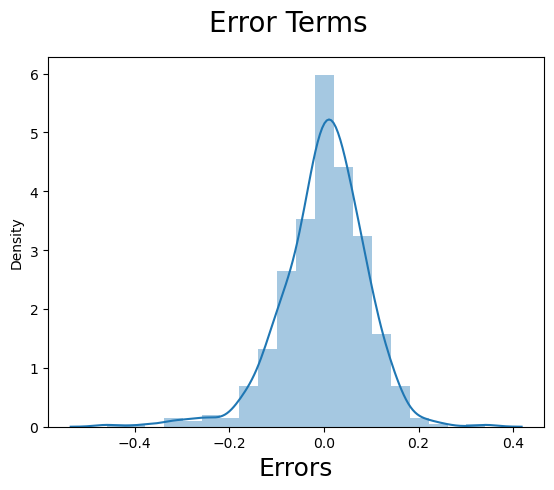

In [87]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Error terms are normally distributed and mean is closer to 0

### Step 7: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 17th model.

In [88]:
#Apply scaling on the test sets
num_vars = ['temp','atemp','hum','windspeed','cnt']
boombikes_data_test[num_vars] = scaler.fit_transform(boombikes_data_test[num_vars])

In [89]:
boombikes_data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_medium rain,weathersit_partly cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,...,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397,0.652968
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,...,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612,0.477117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
y_test = boombikes_data_test.pop('cnt')
X_test = boombikes_data_test

In [91]:
# Adding constant variable to test dataframe
X_test_m17 = sm.add_constant(X_test)

In [92]:
X_test_m17 = X_test_m17.drop(['atemp','mnth_mar','mnth_jun','weekday_wed','weekday_thu','weathersit_partly cloudy','workingday','hum','mnth_aug','mnth_oct','mnth_may','weekday_sat','weekday_tue','weekday_mon','mnth_feb','mnth_jul'], axis = 1)

In [93]:
y_pred_m17 = lr_17.predict(X_test_m17)

Text(0, 0.5, 'y_pred')

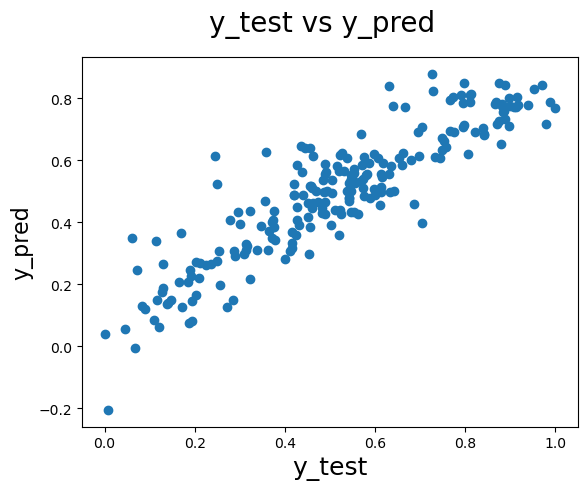

In [94]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m17)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

The equation for our best fitted line is: 
cnt = temp x 0.422 + yr X 0.235 + season_summer X 0.0479 + season_winter X 0.103 + mnth_sept X 0.0798 - holiday X  0.099 - windspeed X 0.159 - season_spring X -0.0592 - mnth_dec X 0.048 - mnth_jan X 0.054 - mnth_nov X 0.043 - weekday_sun X 0.050 - weathersit_cloudy X 0.082 - weathersit_medium rain X 0.299

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m17)

0.8033613023865396